# ML Pipeline :
 First, how to tune your pipeline.
 
 Second, how to best incorporate domain expertise to ensure impact.
 
 Third, how to maintain good performance over time.
 
 And fourth, how to deal with few or low quality labels. These skills combined will make sure you stand out from the crowd!
## 1-Feature engineering 


In [13]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.feature_selection import SelectKBest,chi2
import numpy as  np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import GridSearchCV
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
import  tensorflow as tf 
import pandas as pd 
credit =pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/credit.csv')
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [10]:
credit.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [5]:
num_cols = credit._get_numeric_data().columns
num_cols

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [15]:
non_numeric_columns =credit.select_dtypes(include=['object']).columns
non_numeric_columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [16]:
# Create a label encoder for each column. Encode the values
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

# Inspect the data types of the columns of the data frame
print(credit.dtypes)

checking_status           int32
duration                  int64
credit_history            int32
purpose                   int32
credit_amount             int64
savings_status            int32
employment                int32
installment_commitment    int64
personal_status           int32
other_parties             int32
residence_since           int64
property_magnitude        int32
age                       int64
other_payment_plans       int32
housing                   int32
existing_credits          int64
job                       int32
num_dependents            int64
own_telephone             int32
foreign_worker            int32
class                     int32
dtype: object


# First pipeline

In [17]:
accuracies={}
y = credit['class'].to_numpy()
X = credit.drop('class', axis=1).to_numpy()
# Split the data into train and test, with 20% as test
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

# Create a random forest classifier, fixing the seed to 2
Ada_model = AdaBoostClassifier(random_state=2).fit(
  X_train, y_train)

# Use it to predict the labels of the test data
Ada_predictions = Ada_model.predict(X_test)
accuracies['Ada'] = accuracy_score(y_test, Ada_predictions)

In [18]:
# Split the data into train and test, with 20% as test
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(random_state=2).fit(
  X_train, y_train)

# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)

# Assess the accuracy of both classifiers
accuracies['rf'] = accuracy_score(y_test, rf_predictions)

In [16]:
for x, y in accuracies.items():
    print("model {} have an accuracy {}".format(x,y))

model Ada have an accuracy 0.75
model rf have an accuracy 0.775


# Grid search CV for model complexity
In the last slide, you saw how most classifiers have one or more hyperparameters that control its complexity. You also learned to tune them using GridSearchCV(). In this exercise, you will perfect this skill. You will experiment with:

The number of trees, n_estimators, in a RandomForestClassifier.
The maximum depth, max_depth, of the decision trees used in an AdaBoostClassifier.

**The number of nearest neighbors, n_neighbors, in KNeighborsClassifier.
====>The best-performing tree depth increases as the number of estimators grows in this case. This is in fact what tends to happen in most cases.**

In [5]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50,10)}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 20}

In [23]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

# Optimize for a AdaBoostClassifier() using GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 10}

In [26]:
 from sklearn.neighbors import KNeighborsClassifier
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10,50,100]}

# Optimize for KNeighborsClassifier() using GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_neighbors': 50}

# Feature engineering and overfitting


In [19]:
y = credit['class']
X = credit.drop('class', axis=1)
# Create numeric encoding for credit_history
credit_history_num = LabelEncoder().fit_transform(
  credit['credit_history'])

# Create a new feature matrix including the numeric encoding
X_num = pd.concat([X, pd.Series(credit_history_num)], 1)

# Create new feature matrix with dummies for credit_history
X_hot = pd.concat(
  [X, pd.get_dummies(credit['credit_history'])], 1)

# Compare the number of features of the resulting DataFrames
print(X_hot.shape[1] > X_num.shape[1])

True


In [36]:
# Function computing absolute difference from column mean
def abs_diff(x):
    return np.abs(x-np.mean(x))

# Apply it to the credit amount and store to new column
credit['diff'] = abs_diff(credit['credit_amount'])

# Create a feature selector with chi2 that picks one feature
sk = SelectKBest(chi2, k=1)

# Use the selector to pick between credit_amount and diff
sk.fit(credit[['credit_amount', 'diff']], credit['class'])

# Inspect the results
sk.get_support()

array([ True, False])

In [48]:
# Find the best value for max_depth among values 2, 5 and 10
rfc = RandomForestClassifier

grid_search = GridSearchCV(rfc(random_state=1), param_grid={'max_depth': [2, 5, 10]})

best_value = grid_search.fit(
  X_train, y_train).best_params_['max_depth']

# Using the best value from above, fit a random forest
clf = rfc(random_state=1, max_depth=best_value).fit(X_train, y_train)

# Apply SelectKBest with chi2 and pick top 10 features
vt = SelectKBest(chi2, k=10).fit(X_train, y_train)

# Create a new dataset only containing the selected features
X_train_reduced = vt.transform(X_train)

# Data fusion


In [49]:
lanl_flows =pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/lanl_flows.csv')
lanl_flows.head()

,time,duration,source_computer,source_port,destination_computer,destination_port,protocol,packet_count,byte_count
0,471692,0,C5808,N24128,C26871,N17023,6,1,60
1,471692,0,C5808,N2414,C26871,N19148,6,1,60
2,471692,0,C5808,N24156,C26871,N8001,6,1,60
3,471692,0,C5808,N24161,C26871,N18502,6,1,60
4,471692,0,C5808,N24162,C26871,N11309,6,1,60


In [50]:
lanl_flows.shape

(10000, 9)

In [53]:
def featurize(df):
    return {'unique_ports':len(set(df['destination_port'])),
            'average_packet':np.mean(df['packet_count']),
            'average_duration': np.mean(df['duration'])}

# Group by source computer, and apply the feature extractor
out = lanl_flows.groupby('source_computer').apply(featurize)

# Convert the iterator to a dataframe by calling list on it
X1 = pd.DataFrame(list(out), index=out.index)
X1.head()

,unique_ports,average_packet,average_duration
source_computer,,,
C10,4,222.000000,5.000000
C10026,2,21.000000,39.000000
C10047,5,21.076923,7.538462
C1015,35,5.371429,27.571429
C10235,1,11.000000,0.000000


# Is the source or the destination bad?

In [ ]:

# Check which sources in X.index are bad to create labels
y = [x in bads for x in X.index]

# Report the average accuracy of Adaboost over 3-fold CV
print(np.mean(cross_val_score(AdaBoostClassifier(), X, y)))

In [ ]:
# Create a feature counting unique protocols per source
protocols = flows.groupby('source_computer').apply(
  lambda df: len(set(df['protocol'])))

# Convert this feature into a dataframe, naming the column
protocols_DF = pd.DataFrame(
  protocols, index=protocols.index, columns=['protocol'])

# Now concatenate this feature with the previous dataset, X
X_more = pd.concat([X, protocols_DF], axis=1)

# Refit the classifier and report its accuracy
print(np.mean(cross_val_score(
  AdaBoostClassifier(), X_more, y)))

# Imperfect labels
## Turning a heuristic into a classifier

In [ ]:
# Create a new dataset X_train_bad by subselecting bad hosts
X_train_bad = X_train[y_train]

# Calculate the average of unique_ports in bad examples
avg_bad_ports = np.mean(X_train_bad['unique_ports'])

# Label as positive sources that use more ports than that
pred_port = X_test['unique_ports'] > avg_bad_ports

# Print the accuracy of the heuristic
print(accuracy_score(y_test, pred_port))

In [ ]:
# Compute the mean of average_packet for bad sources
avg_bad_packet = np.mean(X_train[y_train]['average_packet'])

# Label as positive if average_packet is lower than that
pred_packet = X_test['average_packet'] < avg_bad_packet

# Find indices where pred_port and pred_packet both True
pred_port = X_test['unique_ports'] > avg_bad_ports
pred_both = pred_packet * pred_port

# Ports only produced an accuracy of 0.919. Is this better?
print(accuracy_score(y_test, pred_both))

# Dealing with label noise

In [ ]:
# Fit a Gaussian Naive Bayes classifier to the training data
clf = GaussianNB().fit(X_train, y_train_noisy)

# Report its accuracy on the test data
print(accuracy_score(y_test, clf.predict(X_test)))

# Assign half the weight to the first 100 noisy examples
weights = [0.5]*100 + [1.0]*(len(y_train_noisy)-100)

# Refit using weights and report accuracy. Has it improved?
clf_weights = GaussianNB().fit(X_train, y_train_noisy, sample_weight=weights)
print(accuracy_score(y_test, clf_weights.predict(X_test)))

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
y = [1,1,1,1,0,0,1]
compute_sample_weight(class_weight='balanced', y=y)
Output:

array([ 0.7 ,  0.7 ,  0.7 ,  0.7 ,  1.75,  1.75,  0.7 ])
# You can use this as input to the sample_weight keyword.
# https://towardsdatascience.com/why-weight-the-importance-of-training-on-balanced-datasets-f1e54688e7df
# https://stats.stackexchange.com/questions/149801/classifer-for-unbalanced-dataset
# https://stats.stackexchange.com/questions/244630/difference-between-sample-weight-and-class-weight-randomforest-classifier

# Reminder of performance metrics

In [8]:
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))
print((tp + tn)/len(y_test))

NameError: name 'precision_score' is not defined

In [21]:
from sklearn.metrics import  accuracy_score,confusion_matrix
# Fit a random forest classifier to the training data
clf = RandomForestClassifier(random_state=2).fit(X_train, y_train)

# Label the test data
preds = clf.predict(X_test)

# Get false positives/negatives from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# Now compute the cost using the manager's advice
cost = fp*10 + fn*150

# Default thresholding

In [58]:
# Score the test data using the given classifier
scores = clf.predict_proba(X_test)

# Get labels from the scores using the default threshold
preds = [s[1] > 0.5 for s in scores]

# Use the predict method to label the test data again
preds_default = clf.predict(X_test)

# Compare the two sets of predictions
all(preds == preds_default)

True

# Optimizing the threshold

In [61]:
from sklearn.metrics import f1_score
# Create a range of equally spaced threshold values
t_range = [0.0, 0.25, 0.5, 0.75, 1.0]

# Store the predicted labels for each value of the threshold
preds = [[s[1] > thr for s in scores] for thr in t_range]

# Compute the accuracy for each threshold
accuracies = [accuracy_score(y_test, p) for p in preds]

# Compute the F1 score for each threshold
f1_scores = [f1_score(y_test, p) for p in preds]

# Report the optimal threshold for accuracy, and for F1
print(t_range[np.argmax(accuracies)], t_range[np.argmax(f1_scores)])

0.5 0.5


# Bringing it all together

In [ ]:
# Create a scorer assigning more cost to false positives
def my_scorer(y_test, y_est, cost_fp=10.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

# Fit a DecisionTreeClassifier to the data and compute the loss
clf = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)
print(my_scorer(y_test, clf.predict(X_test)))

# Refit, downweighting subjects whose weight is above 80
weights = [0.5 if w > 80 else 1.0 for w in X_train.weight]
clf_weighted = DecisionTreeClassifier(random_state=2).fit(
  X_train, y_train, sample_weight=weights)
print(my_scorer(y_test, clf_weighted.predict(X_test)))

# From workflows to pipelines


In [23]:
from sklearn.feature_selection import f_classif
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
params = {
   'feature_selection__k':[10, 20],
   'clf__n_estimators':[2, 5]}

# Initialise the grid search object
grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

# Fit it to the data and print the best value combination
print(grid_search.fit(X_train, y_train).best_params_)

{'clf__n_estimators': 5, 'feature_selection__k': 10}


# Model deployment
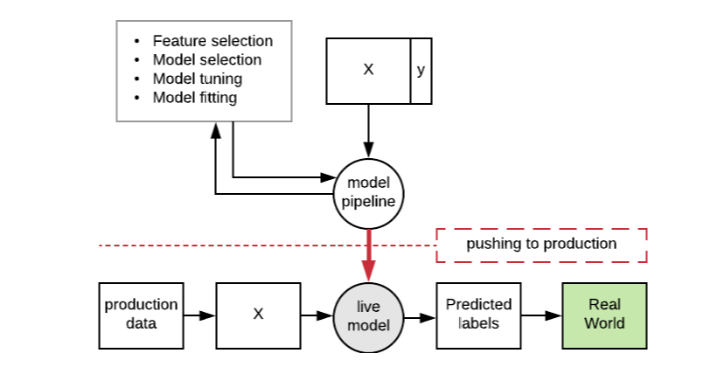


In [73]:
import pickle
# Fit a random forest to the training set
clf = RandomForestClassifier(random_state=42).fit(
  X_train, y_train)

# Save it to a file, to be pushed to production
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file=file)

# Now load the model from file in the production environment
with open('model.pkl', 'rb') as file:
    clf_from_file = pickle.load(file)

# Predict the labels of the test dataset
preds = clf_from_file.predict(X_test)

# Custom function transformers in pipelines

At some point, you were told that the sensors might be performing poorly for obese individuals. Previously you had dealt with that using weights, but now you are thinking that this information might also be useful for feature engineering, so you decide to replace the recorded weight of an individual with an indicator of whether they are obese. You want to do this using pipelines. You have numpy available as np, RandomForestClassifier(), FunctionTransformer(), and GridSearchCV()
https://stackoverflow.com/questions/50965004/sklearn-custom-transformers-difference-between-using-functiontransformer-and-su

In [75]:
# Define a feature extractor to flag very large values
from sklearn.preprocessing import FunctionTransformer
def more_than_average(X, multiplier=1.0):
    Z = X.copy()
    Z[:,1] = Z[:,1] > multiplier*np.mean(Z[:,1])
    return Z

# Convert your function so that it can be used in a pipeline
pipe = Pipeline([
  ('ft', FunctionTransformer(more_than_average)),
  ('clf', RandomForestClassifier(random_state=2))])

# Optimize the parameter multiplier using GridSearchCV
params = {'ft__multiplier':[1, 2, 3]}
grid_search = GridSearchCV(pipe, param_grid=params)

# Iterating without overfitting

1. Iterating without overfitting

If you thought that after you deploy your model, your work is done, think again! There will always be opportunities to improve your model further.

2. Why iterate?

Indeed, in what is known as "agile software development", you will be asked to deploy the simplest possible model as soon as you can. Then you can choose to tune it further while users start giving feedback.

3. Why iterate?

You might also want to retrain your model on fresh data, coming in from production.

4. Why iterate?

Or you might get other types of feedback, like ideas for new features, or loss functions.

5. Champion-challenger

In all cases, you end up with one model in production, which is often referred to as the current "champion", and one in development, the "challenger", which might eventually replace the champion.

6. Cross-validation results

However, recall that working on the same data for too long risks overfitting. You can dig deeper into cross-validation to detect this. Recall that cross-validation splits your data into training and test internally several times - in this example, three times as controlled by the parameter cv. Switch "return_train_score" to True when you fit the grid object. Then, cast the attribute cv-underscore-results-underscore of the output into a DataFrame. This yields a number of metrics, one per column, for each parameter combination, one per row. Focus on the mean training and test score, and their standard deviations, shown here.

7. Cross-validation results

The first thing to note is whether the training score is a lot higher than the test score. Although we always expect this to be true, very large differences might indicate overfitting and a need for more training data. Another warning sign is when the standard deviation of the test score, especially that of the winning row, is very large. Excess variation of the test score across different ways of splitting the data indicates too much sensitivity to the training data, which is a sign of overfitting.

8. Data splitting review

So let us step back and review our data splitting strategy. We start by splitting into training and test, and then via cross-validation we effectively split our training set further into a chunk used for model fitting, and one for model tuning and selection.

9. Data splitting review

It is confusing to call two chunks of data test, so let us rename the initial test split as "validation". The validation set gives us an unbiased estimate of accuracy.

10. Detecting overfitting

So there are a few possibilities to think about. If the CV train score is much larger than CV test, this is indication of overfitting in the model fit stage. So you could reduce the classifier complexity, or add more training data. Remember that 10-fold CV assigns nine tenths of the data for model fitting, whereas 3-fold only assigns two thirds. So increasing the number of CV folds can help. Analogously, if the CV Test score is much higher than the validation score, this suggests that you have overfitted during the tuning and selection step. Reducing the size of the parameter grid you are searching over.

11. Fresh data

So far we have focused on further development using the same data.

12. Fresh data

But what about incorporating fresh production data? Well, you could just add it to the mix, but you might find your performance is quite different on fresh data than on your training set. This is known as dataset shift, and it is the subject of the next video exercise!
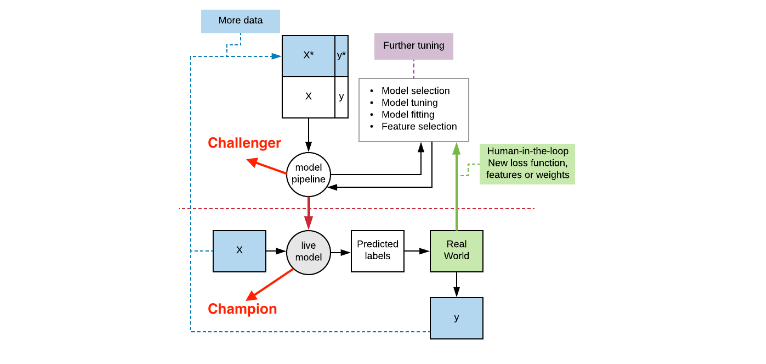
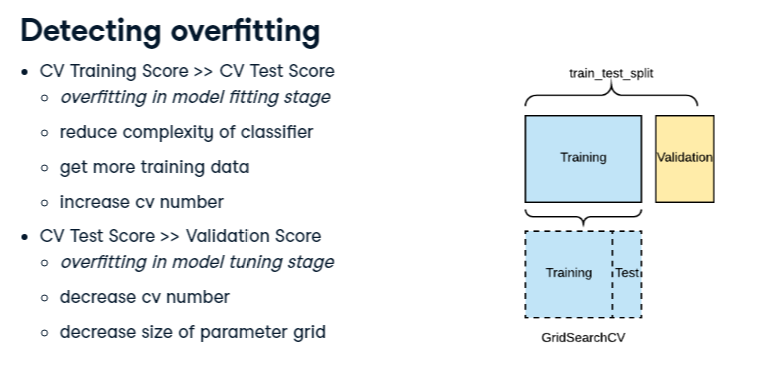

# Challenge the champion
Having pushed your random forest to production, you suddenly worry that a naive Bayes classifier might be better. You want to run a champion-challenger test, by comparing a naive Bayes, acting as the challenger, to exactly the model which is currently in production, which you will load from file to make sure there is no confusion. You will use the F1 score for assessment. You have the data X_train, X_test, y_train and y_test available as before and GaussianNB(), f1_score() and pickle()

In [ ]:
# Load the current model from disk
champion = pickle.load(open('model.pkl', 'rb'))

# Fit a Gaussian Naive Bayes to the training data
challenger = GaussianNB().fit(X_train, y_train)

# Print the F1 test scores of both champion and challenger
print(f1_score(y_test, champion.predict(X_test)))
print(f1_score(y_test, challenger.predict(X_test)))

# Write back to disk the best-performing model
with open('model.pkl', 'wb') as file:
    pickle.dump(champion, file=file)

# Cross-validation statistics
You used grid search CV to tune your random forest classifier, and now want to inspect the cross-validation results to ensure you did not overfit. In particular you would like to take the difference of the mean test score for each fold from the mean training score. The dataset is available as X_train and y_train, the pipeline as pipe, and a number of modules are pre-loaded including pandas as pd and GridSearchCV().

In [24]:
# Fit your pipeline using GridSearchCV with three folds
grid_search = GridSearchCV(pipe, params, cv=3, return_train_score=True)

# Fit the grid search
gs = grid_search.fit(X_train, y_train)

# Store the results of CV into a pandas dataframe
results = pd.DataFrame(gs.cv_results_)

# Print the difference between mean test and training scores
print(results['mean_test_score']-results['mean_train_score'])

0   -0.272443
1   -0.261193
2   -0.236830
3   -0.258703
dtype: float64


 **Great work. The difference between training and test performance seems quite big here, and that is always a telltale sign of overfitting!**

# Dataset shift

1. Dataset shift

Welcome back! Sometimes, models perform less well in production than in development. This is usually attributed to overfitting, but there is another possibility. Your production data might differ in subtle ways from your training data so that the patterns you had extracted are now obsolete; a phenomenon known as "dataset shift". Let's see how we can use scikit-learn to overcome it.

2. What is dataset shift?

A common example of dataset shift is temporal change. Consider the following dataset on electricity prices in New South Wales, where you are tasked to predict whether the price will go up or down on the basis of a number of features. A structural change in the market occurred midway through the period of interest. Would the performance of a classifier built on earlier data be affected? Let's investigate.

3. What is shifting exactly?

Consider a scatterplot between two variables from this data, with class 1 examples drawn in yellow and class 0 in purple. We also display the decision boundary of a naive Bayes classifier trained on this data. The data shown here are from a time period before the suspected shift occurred.

4. What is shifting exactly?

On the right, you can see the analogous plot for recent data. The decision boundary has indeed shifted significantly. Hence, a classifier trained on old data is far less relevant than one trained on fresh data. In some parts of the literature, the true decision boundary is known as the "concept" which we are attempting to learn, so that dataset shift is also known as "concept drift".

5. Windows

An easy way to protect your model against dataset shift is to regularly retrain it using only a batch of recent data, a technique known as windowing. This is easy to implement in pandas using location indexing: look back a fixed number of data points from the current position in the stream; that number is known as the "window size". This is in contrast to training on the full data available so far, also known as an expanding window.

6. Dataset shift detection

Comparing the performance of sliding and expanding windows in a champion-challenger setup is a great dataset shift detector: expanding windows contain more data than sliding windows, so the only reason for the latter to win is dataset shift. Consider what happens at time = 40000 of the electricity dataset. First, train a classifier on the entire dataset up to that time. Then, train a classifier on the last 20 thousand data points only. We want to compare the performance of these two classifiers on future data. In other words, we will use all the data from time 40 thousand onwards as test data. A quick comparison in terms of AUC suggests that the sliding window outperforms the expanding one, confirming dataset shift.

7. Window size

The window size is a critical parameter: windows that are too small have too little information, but windows that are too large might contain old data that confuse the classifier. It is good practice to fit a classifier on windows of different size, and pick the size that performs best on a test dataset. In the arrhythmia data case, as you can see from the plot, a window of size 50 seems best.

8. Domain shift

Temporal change is not the only driver of dataset shift. Another possibility is that the data source subtly changes from development to production, a phenomenon referred to as domain shift. Take the example of an app trying to diagnose arrhythmia from ECG data. Perhaps the model was built on an open-source dataset of elderly patients and then struggles to deal with younger subjects in production.

9. More data is not always better!

Time for you to practice tuning the window size yourself.
# Tuning the window size
You want to check for yourself that the optimal window size for the arrhythmia dataset is 50. You have been given the dataset as a pandas data frame called arrh, and want to use a subset of the data up to time t_now. Your test data is available as X_test, y_test. You will try out a number of window sizes, ranging from 10 to 100, fit a naive Bayes classifier to each window, assess its F1 score on the test data, and then pick the best performing window size. You also have numpy available as np, and the function f1_score() has been imported already. Finally, an empty list called accuracies has been initialized for you to store the accuracies of the windows.

In [ ]:
# Loop over window sizes
for w_size in wrange:

    # Define sliding window
    sliding = arrh.loc[(t_now - w_size + 1):t_now]

    # Extract X and y from the sliding window
    X, y = sliding.drop('class', 1), sliding['class']
    
    # Fit the classifier and store the F1 score
    preds = GaussianNB().fit(X, y).predict(X_test)
    accuracies.append(f1_score(y_test, preds))

# Estimate the best performing window size
optimal_window = wrange[np.argmax(accuracies)]

# Bringing it all together
You have two concerns about your pipeline at the arrhythmia detection startup:

The app was trained on patients of all ages, but is primarily being used by fitness users who tend to be young. You suspect this might be a case of domain shift, and hence want to disregard all examples above 50 years old.
You are still concerned about overfitting, so you want to see if making the random forest classifier less complex and selecting some features might help with that.
You will create a pipeline with a feature selection SelectKBest() step and a RandomForestClassifier, both of which have been imported. You also have access to GridSearchCV(), Pipeline, numpy as np and pickle. The data is available as arrh

In [ ]:
# Create a pipeline 
pipe = Pipeline([
  ('ft', SelectKBest()), ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
grid = {'ft__k':[5, 10], 'clf__max_depth':[10, 20]}

# Execute grid search CV on a dataset containing under 50s
grid_search = GridSearchCV(pipe, param_grid=grid)
arrh = arrh.iloc[np.where(arrh['age'] < 50)]
grid_search.fit(arrh.drop('class', 1), arrh['class'])

# Push the fitted pipeline to production
with open('pipe.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

# Anomaly detection
## A simple outlier
When you first encounter a new type of algorithm, it is always a great idea to test it with a very simple example. So you decide to create a list containing thirty examples with the value 1.0 and just one example with value 10.0, which you expect should be flagged as an outlier. To make sure you use the algorithm correctly, you convert the list to a pandas dataframe, and feed it into the local outlier factor algorithm. pandas is available to you as pd

In [25]:
# Import the LocalOutlierFactor module
from sklearn.neighbors import LocalOutlierFactor as lof

# Create the list [1.0, 1.0, ..., 1.0, 10.0] as explained
x = [1.0]*30
x.append(10.0)

# Cast to a data frame
X = pd.DataFrame(x)

# Fit the local outlier factor and print the outlier scores
print(lof().fit_predict(X))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


# LoF contamination
Your medical advisor at the arrhythmia startup informs you that your training data might not contain all possible types of arrhythmia. How on earth will you detect these other types without any labeled examples? Could an anomaly detector tell the difference between healthy and unhealthy without access to labels? But first, you experiment with the contamination parameter to see its effect on the confusion matrix. You have LocalOutlierFactor as lof, numpy as np, the labels as ground_truth encoded in -1and 1 just like local outlier factor output, and the unlabeled training data as X.

In [27]:
# Fit the local outlier factor and output predictions
preds = lof().fit_predict(X)

# Print the confusion matrix
print(confusion_matrix(X, preds))

[[ 0  0  0]
 [ 0 30  0]
 [ 1  0  0]]


## Repeat but now set the proportion of datapoints to be flagged as outliers to 0.2. Print the confusion matrix

In [29]:
# Set the contamination parameter to 0.2
preds = lof(contamination=0.2).fit_predict(X)

# Print the confusion matrix
print(confusion_matrix(X, preds))

[[ 0  0  0]
 [ 0 30  0]
 [ 1  0  0]]


# Novelty detection


In [30]:
# Create a list of thirty 1s and cast to a dataframe
X = pd.DataFrame([1.0]*30)

# Create an instance of a lof novelty detector
detector = lof(novelty=True)

# Fit the detector to the data
detector.fit(X)

# Use it to predict the label of an example with value 10.0
print(detector.predict(pd.DataFrame([10.0])))

[-1]


## Three novelty detectors

Finally, you know enough to run some tests on the use of a few anomaly detectors on the arrhythmia dataset. To test their performance, you will train them on an unlabeled training dataset, but then compare their predictions to the ground truth on the test data using their method .score_samples(). This time, you will be asked to import the detectors as part of the exercise, but you do have the data X_train, X_test, y_train, y_test preloaded as usual.

In [31]:
# Import the novelty detector
from sklearn.svm import OneClassSVM as onesvm

# Fit it to the training data and score the test data
svm_detector = onesvm().fit(X_train)
scores = svm_detector.score_samples(X_test)

In [ ]:
# Import the novelty detector
from sklearn.ensemble import IsolationForest as isof

# Fit it to the training data and score the test data
isof_detector = isof().fit(X_train)
scores = isof_detector.score_samples(X_test)

In [ ]:
# Import the novelty detector
from sklearn.neighbors import LocalOutlierFactor as lof

# Fit it to the training data and score the test data
lof_detector = lof(novelty=True).fit(X_train)
scores = lof_detector.score_samples(X_test)

# Contamination revisited
You notice that one-class SVM does not have a contamination parameter. But you know well by now that you really need a way to control the proportion of examples that are labeled as novelties in order to control your false positive rate. So you decide to experiment with thresholding the scores. The detector has been imported as onesvm, you also have available the data as X_train, X_test, y_train, y_test, numpy as np, and confusion_matrix().

In [32]:
# Fit a one-class SVM detector and score the test data
nov_det = onesvm().fit(X_train)
scores = nov_det.score_samples(X_test)

# Find the observed proportion of outliers in the test data
prop = np.mean(y_test==1.0)

# Compute the appropriate threshold
threshold = np.quantile(scores, prop)

# Print the confusion matrix for the thresholded scores
print(confusion_matrix(y_test, scores > threshold))

[[47 12]
 [94 47]]


# Distance-based learning
## Find the neighbor
It is clear that the local outlier factor algorithm depends a lot on the idea of a nearest neighbor, which in turn depends on the choice of distance metric. So you decide to experiment some more with the hepatitis dataset introduced in the previous lesson. You are given three examples stored in features, whose classes are stored in labels. You will identify the nearest neighbor to the first example (row with index 0) using three different distance metrics, Euclidean, Hamming and Chebyshev, and on the basis of that choose which distance metric to use. You will import the necessary module as part of the exercise, but pandas and numpy already available, as are features and their labels labels.

In [ ]:
# Import DistanceMetric as dm
from sklearn.neighbors import DistanceMetric as dm

# Find the Euclidean distance between all pairs
dist_eucl = dm.get_metric('euclidean').pairwise(features)

# Find the Hamming distance between all pairs
dist_hamm = dm.get_metric('hamming').pairwise(features)

# Find the Chebyshev distance between all pairs
dist_cheb = dm.get_metric('chebyshev').pairwise(features)

In [ ]:
# Compute outliers according to the Euclidean metric
out_eucl = lof(metric='euclidean').fit_predict(features)

# Compute outliers according to the Hamming metric
out_hamm = lof(metric='hamming').fit_predict(features)

# Compute outliers according to the Jaccard metric
out_jacc = lof(metric='jaccard').fit_predict(features)

# Find if all three metrics agree on any one datapoint
print(any(out_jacc + out_hamm + out_eucl == -3))

# Unstructured data


In [ ]:
# Wrap the RD-Levenshtein metric in a custom function
def my_rdlevenshtein(u, v):
    return stringdist.rdlevenshtein(u[0], v[0])

# Reshape the array into a numpy matrix
sequences = np.array(proteins['seq']).reshape(-1, 1)

# Compute the pairwise distance matrix in square form
M = squareform(pdist(sequences, my_rdlevenshtein))

# Run a LoF algorithm on the precomputed distance matrix
preds = lof(metric='precomputed').fit_predict(M)

# Compute the accuracy of the outlier predictions
print(accuracy(proteins['label'] == 'VIRUS', preds == -1))

In [ ]:
# Create a feature that contains the length of the string
proteins['len'] = proteins['seq'].apply(lambda s: len(s))

# Create a feature encoding the first letter of the string
proteins['first'] =  LabelEncoder().fit_transform(
  proteins['seq'].apply(lambda s: list(s)[0]))

# Extract scores from the fitted LoF object, compute its AUC
scores_lof = lof_detector.negative_outlier_factor_
print(auc(proteins['label']=='IMMUNE SYSTEM', scores_lof))

# Fit a 1-class SVM, extract its scores, and compute its AUC
svm = OneClassSVM().fit(proteins[['len', 'first']])
scores_svm = svm.score_samples(proteins[['len', 'first']])
print(auc(proteins['label']=='IMMUNE SYSTEM', scores_svm))